# Plotting in R 

## Learning Objectives
- Learn the basics of creating plots using the `plot()` function
- Understand how to use various arguments such as `xlab`, `ylab`, and `col` to customize plots
- Learn how to add new data points or lines to existing plots for enhanced visualization
- Understand how to adjust plot margins and layout for better presentation
- Learn how to create multiple plots in a single window for comparative analysis
- Understand how to save and export plots to different file formats 

## Plots

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way 
to develop insight is often to visualize data. Visualization deserves an entire lecture (or course) of its own, 
but we can explore a few of R’s plotting features. R is synonymous with data analysis and visualisation. R is capable of plotting many 
different types of plots and importantly these are infinitely customisable. To mke a plot look the way we want,
we need to take advantage of the many arguments available in plotting functions. 

The R base function ```plot()``` can generate a range of different plots from some user supplied data. 

If we provide one vector of continuous data, it plots that on the y-axis against the index on the x-axis.

In [1]:
%load_ext rpy2.ipython

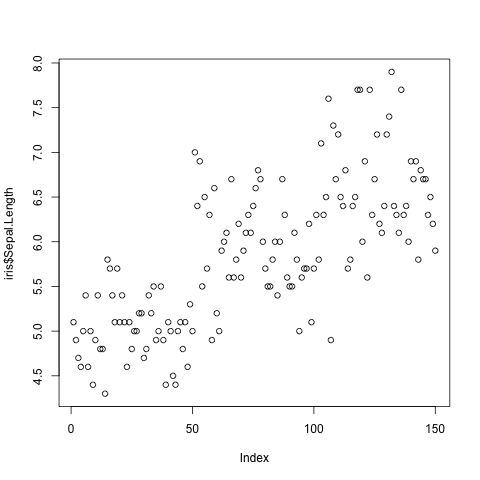

In [2]:
%%R
plot(iris$Sepal.Length)

If we want to plot a scatterplot between two continuous variables, we provide both to the ```plot()``` function. The order here can be important, if not explicitly labeled as the x or y variable, R will take the first entry as the x variable and  the second entry as the y variable. 

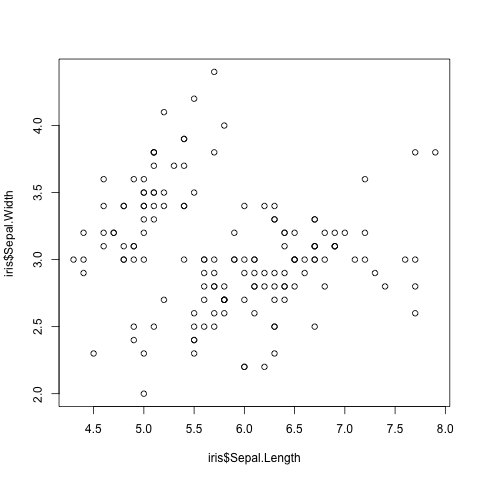

In [3]:
%%R
plot(iris$Sepal.Length, iris$Sepal.Width)

Alternatively we can use the argument keywords to specify which variable should be plotted on which axis, in this 
case is doesn't matter which order we include the arguments. For example we can state the y variable first. 

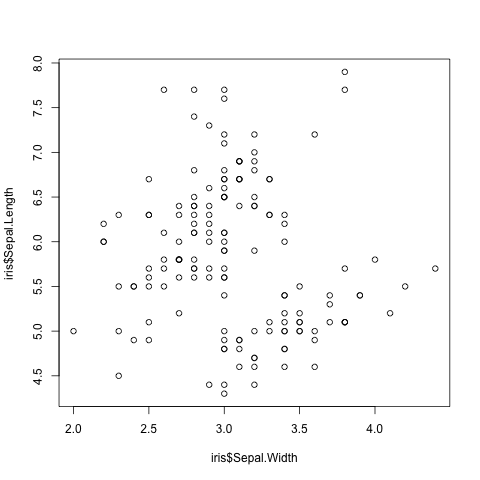

In [4]:
%%R
plot(y = iris$Sepal.Length, x = iris$Sepal.Width)

## Arguements 

When calling a function, in the case of multiple arguments, there are two ways arguments can be specified.  They can be specified **positionally**, where R knows which argument is which based on the order they are listed or  using **keywords** where a keyword followed by = is used to inform R which argument is which. With keyword arguments,  the order does not matter, with positional arguments it is critical. It is not uncommon to see both ways used within the same function call.

You will see that R has generated the axis labels from the variable names. We can customise this with additional 
arguments (```xlab``` and ```ylab```) in the function.

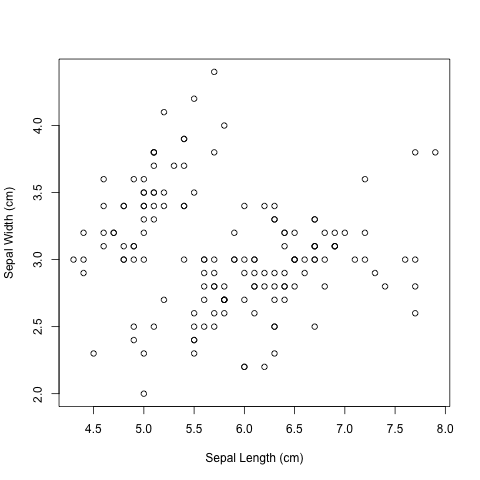

In [5]:
%%R
plot(iris$Sepal.Length, iris$Sepal.Width , xlab = "Sepal Length (cm)", ylab = "Sepal Width (cm)")

We can also change the colour of the points with the ```col``` argument. If we give it one colour, all the points 
will be changed to the same colour.

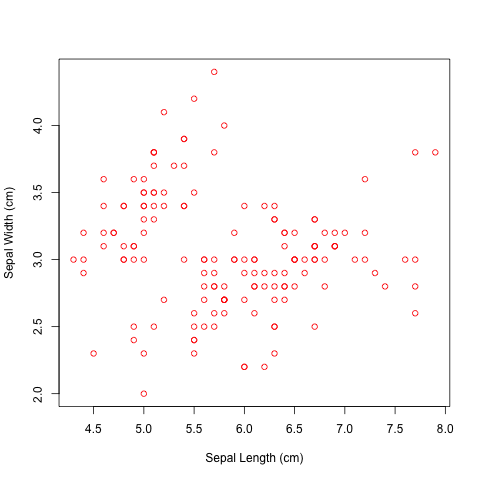

In [6]:
%%R
plot(iris$Sepal.Length, iris$Sepal.Width , xlab = "Sepal Length (cm)", ylab = "Sepal Width (cm)", col = "red")

Alternatively, we can provide a vector of colours, where the first colour will be the colour of the first point drawn, the second colour, the colour of the second point and so on. 
This vector does have to be the same length as the number of points. For example if we provide a vector of three colours, this will recycled until all the points have been pointed. 

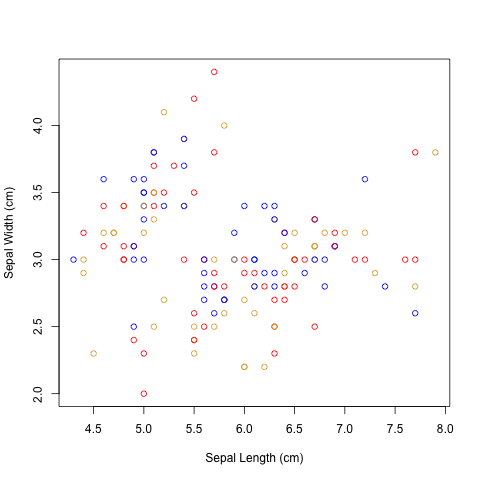

In [7]:
%%R
plot(iris$Sepal.Length, iris$Sepal.Width , xlab = "Sepal Length (cm)", ylab = "Sepal Width (cm)", col = c("red", "blue", "#ddaa33"))

What has happened is the 1st,4th,7th etc are pointed in red, the 2nd,5th,8th etc in blue and the 3rd,6th,9th etc in #ddaa33.

If we want to colour the points by some categorial variable, we can use the fact that factors are represented as integers to subset a vector of colours.

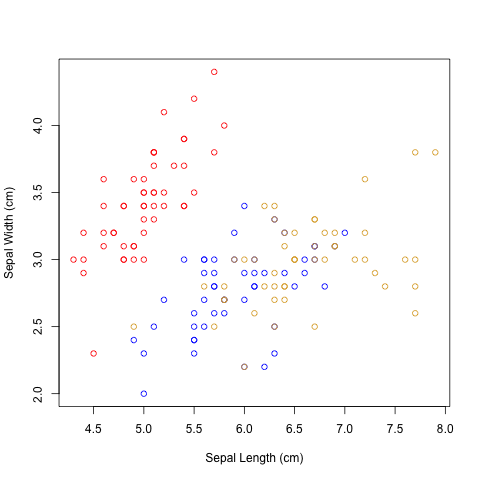

In [8]:
%%R
plot(iris$Sepal.Length, iris$Sepal.Width , xlab = "Sepal Length (cm)", ylab = "Sepal Width (cm)", col = c("red", "blue", "#ddaa33")[iris$Species])

There are three levels in the factor ```iris$Species```, which are represented internally by the numbers 1,2,3. These integers can be used to index a vector of at 
least three as shown below, and create a new vector, where each level is replaced by the same colour.


In [9]:
%%R
iris$Species[1:10]

 [1] setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica


In [10]:
%%R
as.numeric(iris$Species[1:10])

 [1] 1 1 1 1 1 1 1 1 1 1


In [11]:
%%R
c("red", "blue", "#ddaa33")[iris$Species[1:10]]

 [1] "red" "red" "red" "red" "red" "red" "red" "red" "red" "red"


Depending on the data we are attempting to visualize, the type of plot we may want to use will vary. R will automatically try and plot the most  appropriate plot for the data provided. Next, we will use a "~" to provide a formula denoting what we want to plot.  As ```iris$Species``` is a factor, R defaults to a boxplot.



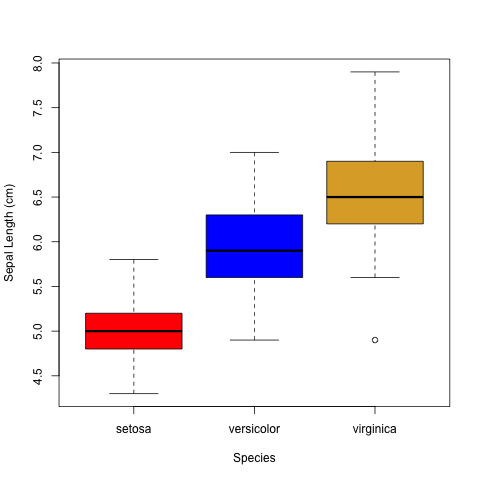

In [12]:
%%R
plot(iris$Sepal.Length ~ iris$Species, ylab = "Sepal Length (cm)", xlab = "Species", col =  c("red", "blue", "#ddaa33"))

Note here, we only need to provide a vector of three colours, as there are only three boxes in the figure. 

As well as the ```plot()``` function R has some specific plot functions (box plots (boxplot()), histograms (hist()) 
and bar plots (barplot())) we can call instead. These functions use a lot of the same arguments to customise the visualise
the appearance of the plot.

For example we can recreate the same boxplot as follows


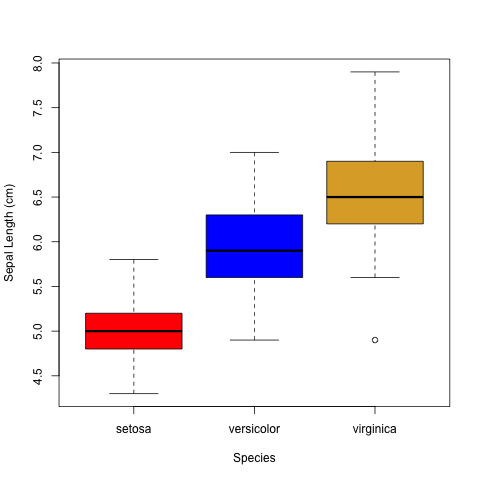

In [13]:
%%R
boxplot(iris$Sepal.Length ~ iris$Species, ylab = "Sepal Length (cm)", xlab = "Species", 
     col =  c("red", "blue", "#ddaa33"))

Histograms are plotted using the function ```hist()```, which allows us to plot the frequency distribution of a vector. 
You can use standard plotting arguments such as col, but also used the argument breaks to adjust the amount of bins.


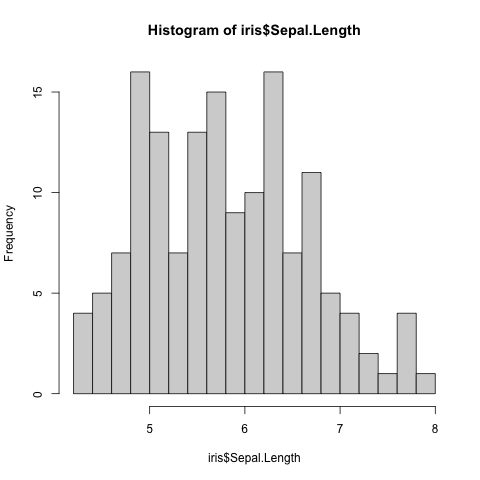

In [14]:
%%R
# Plotting "Sepal.Length" with increased bins
hist(iris$Sepal.Length, breaks = 16)

Below you can see a table containing a lot of basic plotting arguments. Also, for colour selection, making colour themes and looking for colour blind options, you can use https://www.colorhexa.com/ which will give you R friendly colour codes.


|Argument   |Description                                                              |Example                      |
|:----------|:------------------------------------------------------------------------|:----------------------------|
|bg         |The color to be used for the background                                  |bg = "blue"                  |
|cex        |Character size and expansion                                             |cex = 1.5, cex = 0.8         |
|cex.axis   |The magnification to be used for axis annotation                         |cex.axis = 1.2               |
|cex.lab    |he magnification to be used for x and y label                            |cex.lab = 0.8                |
|cex.main   |The magnification to be used for main titles                             |cex.main = 1.3               |
|cex.sub    |The magnification to be used for sub-titles                              |cex.sub = 0.9                |
|col        |Colour                                                                   |col = "red", col = "#ff0000" |
|family     |Font on the plot                                                         |family = "Arial"             |
|fg         |The colour to be used for the foreground of plots                        |fg = "orange"                |
|font       |An integer which specifies which font to use for text. Italic, bold etc. |font = 3                     |
|font.axis  |The font to be used for axis annotation                                  |font.axis = 2                |
|font.lab   |The font to be used for x and y labels                                   |font.lab = 3                 |
|font.main  |The font to be used for plot main titles                                 |font.main = 2                |
|font.sub   |The font to be used for plot sub-titles                                  |font.sub = 2                 |
|lty        |Line type                                                                |lty = 2                      |
|lwd        |Line width                                                               |lwd = 3                      |
|main       |Plot primary title                                                       |main = "Iris"                |
|pch        |Scatter plot symbol for points                                           |pch = 1, pch= "p"            |
|srt        |The string rotation in degrees                                           |srt = 90                     |
|sub        |Subtitle of plot                                                         |sub = "All data"             |
|xlab, ylab |Label of the x or y axis                                                 |xlab = "Distance (Miles)"    |
|xlim, ylim |Min/max x or y axis values                                               |xlim = c(0, 10)              |
|xpd        |If true, allows plotting outside the plot                                |xpd = TRUE                   |

# Adding data to an existing plot

Once you have created a plot, there are various methods which allow us to add more data on top. For example, we may 
want to add individual data points on top of a boxplot, add more data points to a plot or add a line. To do this we 
can use functions such as points(), lines() or abline().

Using ```points()``` and ```lines()```, you can add more data to your plot. They use similar arguments to ```plot()```, 
such as col, lty, pch, cex etc.

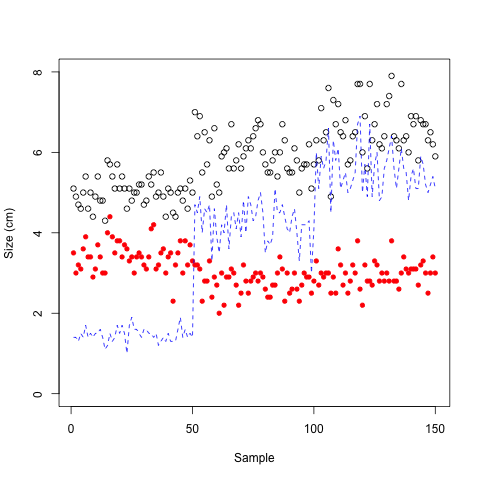

In [15]:
%%R
# Plot "Sepal.Length" on a, then add "Sepal.Width" data as points and "Petal.Length" as lines
plot(iris$Sepal.Length, ylim = c(0, 8), ylab = "Size (cm)", xlab = "Sample")
points(iris$Sepal.Width, col = "red", pch = 19, cex = 0.8)
lines(iris$Petal.Length, lty = 2, col = "blue")

using ```abline()```, you can add horizontal lines (```h=```), vertical lines (```v=```), or diagonal lines(x, y). You can also specify the parameters of the straight line i.e the intercept (```a=```) and slope coefficient (```b=```). It can also be wrapped around a linear regression (```lm()```) to add a line of best fit.



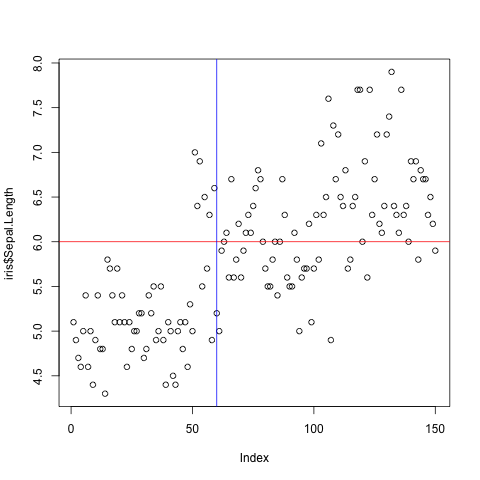

In [16]:
%%R
# Adding a horizontal line at 6 and a vertical line at 60
plot(iris$Sepal.Length)
abline(h = 6, col = "red")
abline(v = 60, col = "blue")

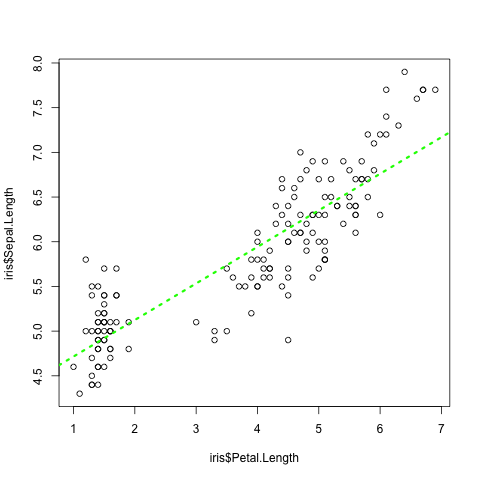

In [17]:
%%R
# Plotting "Sepal.Length" against "Petal.Length" and adding a line of best fit
plot(iris$Sepal.Length ~ iris$Petal.Length)
abline(lm(iris$Sepal.Length ~ iris$Petal.Length), lty = 3, col = "green", lwd = 3)

# Further customisations

We can make many additions to our plots. As there are so many, we will only explore the most common ones here but will 
list additional ones which may be useful in the future. 

We often need to add a legend to our, and can do this using ```legend()```. The ```legend()``` function allows us to 
define position, either by using x, y coordinates or by a word such as "topleft". We also provide the text, colours 
and background.

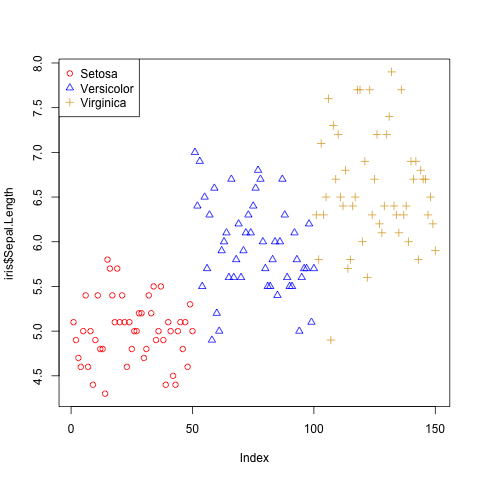

In [18]:
%%R
# Plotting "Sepal.Length" and colouring and using different points by "Species", then adding a legend
plot(iris$Sepal.Length, col = c("red", "blue", "#ddaa33")[iris$Species], 
     pch = c(1, 2, 3)[iris$Species])
legend("topleft", legend = c("Setosa", "Versicolor", "Virginica"), 
       pch = c(1,2,3), col = c("red", "blue", "#ddaa33"))

We can add additional text to a plot by using ```text()``` or ```mtext()``` for putting text in the margin. To use 
```text()```, we provide x, y coordinates, 
the text to be written (```labels =```), size (```cex =```), and colour (```col =```) and font (```font =```). 

Using ```mtext()``` requires different arguments as it is relation to the margin side we put the text in. It requires 
the text (```text = ```), the side of the plot 
the text will go (side =) with 1 = bottom, 2 = left, 3 = top, 4 = right, the margin line to put the text on (line = ).


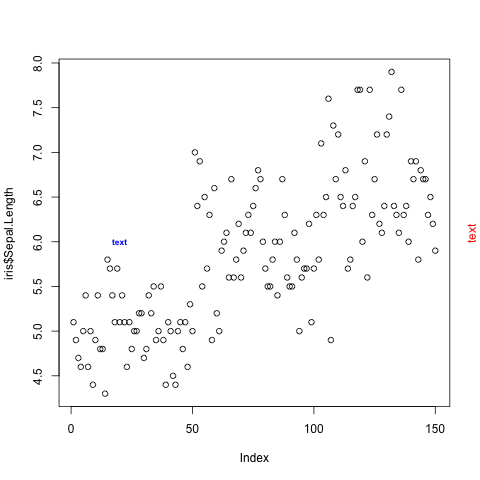

In [19]:
%%R
# Adding text to a plot
plot(iris$Sepal.Length)
text(20, 6, "text", cex = 0.7, col = "blue", font = 2)
mtext("text", side = 4, line = 1, col = "red")

There are times when we may want to add additional axes or move and adjust the axes of a plot. For this, we use 
```axis()``` function after we create our plot. But first we need to tell R not to plot the default axes by 
setting the argument ```axes``` to FALSE when running ```plot()```. ```axis()``` can be used to plot one axis at a time.
Arguments for ```axis()``` including stating which side you want the axis to be drawn ```(side =)``` where 1 = below, 
2 = left, 3 = above and 4 = right, the positions of the tick-marks are drawn ```(at =)```, what the labels are 
```(labels =)```, how far from the axis the ticks should extend ```(line =)```, the position of the axis ```(pos =)```
 and if tick marks should be drawn ```(tick =)```. You can also change the line width ```(lwd =)```, colour ```(col =)```
 and type of line ```(lty =)```. You need to use ```axis()``` for each axis you want to add.

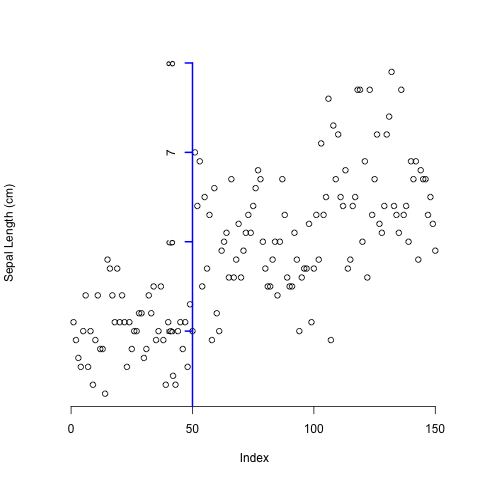

In [20]:
%%R
# Plotting "Sepal.Length" without axes and adding them with adjustment
plot(iris$Sepal.Length, axes = F, ylab="Sepal Length (cm)")
axis(1)
axis(2, pos = 50, at = 1:8, lwd = 2, col = "blue")

If you want to enclose the plot in a box (i.e. add in the extra axes as straight lines) you can use the function ```box()```.

Additional functions to add elements to your plots are ```segments()```, ```arrows()```, ```curve()```, ```rect()```, 
```polygon()``` and ```grid()```.

# Adjusting the plot margins 

There are times when you want to adjust the size of the margins of a plot to make better use of the space available. 
Using ```par()``` with ```mar()``` and/or ```mgp()``` before calling ```plot()```, we can adjust the margins of our plot. 
The function ```par()``` is essentially the function to set the parameters of the plots that follow. We can can it multiple times In
a script to change the appearance of different plots.

Using the argument ```mar``` allows us to adjust the width of the margins on each side of the plot. They are specificed in the unit of 
lines, with the default being ```c(5, 4, 4, 2) + 0.1``` relating to bottom, left, top and right respectively. 

As the ```mar()``` function just changes the width of the margins, anything located outside of the new sized margins
 is just pushed outside of the plotting region. For this reason we may also need to adjust the elements in the margin 
 so we don't just loose them or have them partly cut off. Using ```mgp()``` sets the axis label locations relative to 
 the edge of the inner plot window. It takes a vector of length 3 where, the first value represents the location of 
 the axis label, the second value the position of the tick-mark labels, and third value the position of the tick marks.
 The default is  ```c(3, 1, 0)```.

The argument ```las()``` allows us to specify the orientation of the tick mark labels or any other text added to a plot.
 The options are parallel to the axis (the default, las = 0), always horizontal (las = 1), always perpendicular to the 
 axis (las = 2), and always vertical (las = 3). It can also be used within the ```axis()``` or ```text()``` 
 functions to change the orientation of specific elements.

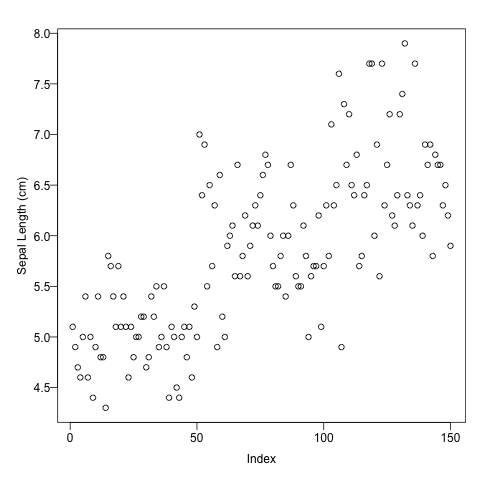

In [21]:
%%R
par(mar = c(4, 4, 2, 1), mgp = c(2, 0.5, 0), las = 1)
plot(iris$Sepal.Length, ylab="Sepal Length (cm)")

# Creating composite plots

There are two options for making composite plots, or a multi-panel plots. 

We can use the ```par()``` function with the arguments ```mfrow``` ```mfcol``` which allows us define a matrix of plots
with a specified number of rows and columns. Using ```mfcol``` draws by columns and ```mfrow``` draws by rows.


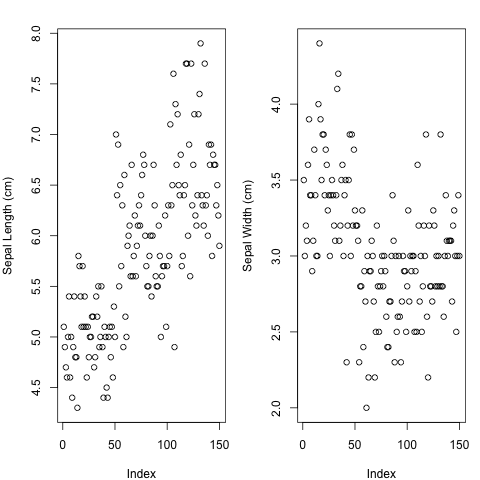

In [22]:
%%R
par(mar = c(4, 4, 2, 1))
par(mfrow = c(1, 2))
plot(iris$Sepal.Length, ylab="Sepal Length (cm)")
plot(iris$Sepal.Width, ylab="Sepal Width (cm)")

Alternatively we can use the function ```layout()``` which allows for complicated ways of combining plots. Again you should think
think of it as a matrix or grid, but in this case a plot can occupy multiple elements. In this way plots can be different sizes.
The relevant argument is ```matrix``` where you need to provide a matrix with increasing integers specifying where you want each plot
to be located. 

For example if we want a plot with three figures, where one figure occupies the top, and there are two figures underneath,
we need a 2x2 matrix with 1s across top and 2 and 3 underneath. We can create a matrix with the function ```matrix()```
where we provide the elements as a vector, the number of rows (or columns or both). The ```byrow``` argument, if true, 
will add the numbers to the matrix by row, if FALSE, it will add by column.


In [23]:
%%R
matrix(c(1, 1, 2, 3), nrow = 2, ncol = 2, byrow = TRUE)

     [,1] [,2]
[1,]    1    1
[2,]    2    3


If we provide the this matrix to the ```layout()``` function, we are telling it to put the first plot to the positions 
occupied with the value 1, the second plot where the value 2 is located, and the third plot where the value 3 is located.


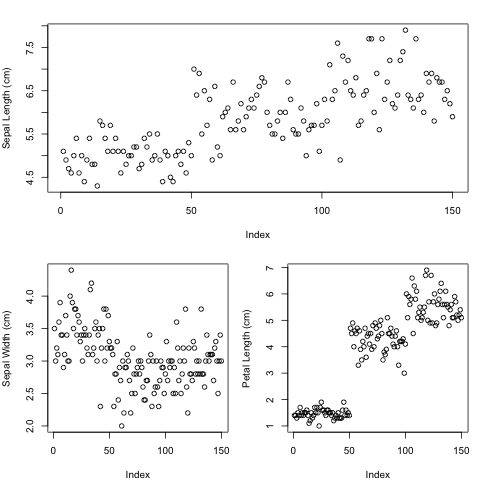

In [24]:
%%R
par(mar = c(4, 4, 2, 1))
layout(matrix(c(1, 1, 2, 3), 2, 2, byrow = TRUE))
plot(iris$Sepal.Length, ylab = "Sepal Length (cm)")
plot(iris$Sepal.Width, ylab = "Sepal Width (cm)")
plot(iris$Petal.Length, ylab = "Petal Length (cm)")

# Saving and exporting plots

We can save our plots in various file formats byusing the appropriate function. These include as a pdf ```(pdf())```, 
jpeg ```(jpeg())```, png ```(png())``` or tiff ```(tiff())```. These functions, with their arguments, need to be called
before the plot is created (in order to open the connection to the file), and then the connection needs to be closed 
by executing ```dev.off()```. The first argument for all of these functions is the path and/or file name where you want 
save the plot. When you call these functions you can also define the size of the image (using the arguments ```width```,
```height```, ```units```, the background colour ```bg``` and resolution ```res```. If the file does not exist it will be
created, if it already exists, it will be overwritten without warning. All of these functions apart from ```pdf()``` 
will only save one image (although this could be a multi panel plot), and the last image that is plotted before ```dev.off()```
is called. ```pdf()``` on the other hand will save multiple images as multiple pages. 

In [25]:
%%R
# Saving a plot as a jpeg file
jpeg("images/exampleplot.jpg", width = 300, height = 300, units = "mm", bg = "white", res = 200)
plot(iris$Sepal.Length, ylab = "Sepal Length (cm)")
dev.off()

quartz_off_screen 
                2 


## Activity: 

1. Make two objects, one object containing values 1-20, and another object containing values 40-21
    * Using your objects, create a plot with the object containing 1:20 on the x-axis and the object containing 40-21 on y-axis
    * Change the x-axis label to "Independent Variable" and y-axis label to "Dependent Variable"
    * Expand both axes to show values 1-40
    * Increase the data point size, change their style and make them repeat between five colours
    * Add a legend top the top right of the plot showing the five colours you have chosen and labelling them A, B, C, D, and E
    * Add a horizontal line at 30, choose a colour, weight and style
    * Add a vertical line at 10, choose a different colour, weight and style
    * Add text saying "Cross Point" to the top right of the intersection of the two lines. Adjust the colour and size


2. Using "iris", create a scatter plot with "Sepal.Length" on x-axis, labelled "Sepal length (cm)", and the other three variables plotted on y-axis, with the label being "Size (cm)"
    * Colour the three species differently and make the three measures different style of points 
    * Add a legend to show all the groups, and make sure it doesn't cover any points
    * Make sure the x-axis limits are 0-8 and y-axis limit is 4-8
    * Adjust the margins to give a larger space around the edge of the plot and move the axis labels a little away from the axes
    * Export the image as a pdf


3. Create a composite plot with the following panels using "iris". Make the plots colourful and variable, that all points are visible in plotting window, axes have labels and measurement units. Export the plot as a high resolution (200) jpeg. Make sure the points and text are readable, and all info is visible. You may need to adjust margins
    * Box plot of "Petal.Length" by species coloured by species
    * Histogram of "Petal.Length" with 6 breaks, each one coloured differently, with a line added for the mean (hint: mean), coloured and labelled "Mean = X" where "X" is the mean value. Make this panel take more space
    * "Petal.Length" against "Petal.Width" for just "virginica" species, with a line of best fit (hint: subsetting)


## Summary Quiz

In [29]:
from jupyterquiz import display_quiz
display_quiz("questions/summary_plots.json")

<IPython.core.display.Javascript object>